### Json파일을 이용한 그래프 출력

In [1]:
# 패키지 임포트
import psycopg2
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# json데이터 불러오기
with open('wave_current_2018_lat32.0_36.0_lon123.0_131.0.json') as f:
    data = json.load(f)

In [3]:
data

{'current_data': [{'lat': 32.90624999999942,
   'lon': 124.51041666666667,
   'currentu': -0.15795819461345673,
   'currentv': -0.17268086969852448,
   'windu': -3.200681447982788,
   'windv': 1.878020167350769},
  {'lat': 32.92708333333267,
   'lon': 124.51041666666667,
   'currentu': -0.1558409184217453,
   'currentv': -0.17598779499530792,
   'windu': -3.225640296936035,
   'windv': 1.9194285869598389},
  {'lat': 32.92708333333267,
   'lon': 124.51041666666667,
   'currentu': -0.1558409184217453,
   'currentv': -0.17598779499530792,
   'windu': -3.225640296936035,
   'windv': 1.9194285869598389},
  {'lat': 32.94791666666617,
   'lon': 124.51041666666667,
   'currentu': -0.15653911232948303,
   'currentv': -0.1830223947763443,
   'windu': -3.251175880432129,
   'windv': 1.9597930908203125},
  {'lat': 32.94791666666617,
   'lon': 124.51041666666667,
   'currentu': -0.15653911232948303,
   'currentv': -0.1830223947763443,
   'windu': -3.251175880432129,
   'windv': 1.9597930908203125},

In [4]:
current_data = data['current_data']

In [5]:
current_data

[{'lat': 32.90624999999942,
  'lon': 124.51041666666667,
  'currentu': -0.15795819461345673,
  'currentv': -0.17268086969852448,
  'windu': -3.200681447982788,
  'windv': 1.878020167350769},
 {'lat': 32.92708333333267,
  'lon': 124.51041666666667,
  'currentu': -0.1558409184217453,
  'currentv': -0.17598779499530792,
  'windu': -3.225640296936035,
  'windv': 1.9194285869598389},
 {'lat': 32.92708333333267,
  'lon': 124.51041666666667,
  'currentu': -0.1558409184217453,
  'currentv': -0.17598779499530792,
  'windu': -3.225640296936035,
  'windv': 1.9194285869598389},
 {'lat': 32.94791666666617,
  'lon': 124.51041666666667,
  'currentu': -0.15653911232948303,
  'currentv': -0.1830223947763443,
  'windu': -3.251175880432129,
  'windv': 1.9597930908203125},
 {'lat': 32.94791666666617,
  'lon': 124.51041666666667,
  'currentu': -0.15653911232948303,
  'currentv': -0.1830223947763443,
  'windu': -3.251175880432129,
  'windv': 1.9597930908203125},
 {'lat': 32.968749999999666,
  'lon': 124.510

In [6]:
header = ['lat', 'lon', 'currentu', 'currentv', 'windu', 'windv']

In [7]:
#data_pd = pd.DataFrame(init_data)
data_pd = pd.DataFrame(current_data, columns=header)

In [8]:
data_pd

lat         lon  currentu  currentv     windu     windv
0      32.906250  124.510417 -0.157958 -0.172681 -3.200681  1.878020
1      32.927083  124.510417 -0.155841 -0.175988 -3.225640  1.919429
2      32.927083  124.510417 -0.155841 -0.175988 -3.225640  1.919429
3      32.947917  124.510417 -0.156539 -0.183022 -3.251176  1.959793
4      32.947917  124.510417 -0.156539 -0.183022 -3.251176  1.959793
...          ...         ...       ...       ...       ...       ...
67494  35.489583  130.031250  0.119795  0.275792  2.380475 -0.021872
67495  35.489583  130.052083  0.066300  0.271693  2.402136 -0.062293
67496  35.489583  130.072917  0.033611  0.246264  2.423975 -0.105626
67497  35.489583  130.093750  0.062897  0.211477  2.445870 -0.151919
67498  35.489583  130.114583  0.090391  0.175938  2.467868 -0.200474

[67499 rows x 6 columns]

In [9]:
# 지도데이터 불러오기
map1 = pd.read_csv('SW_korea_map.csv')
map1

Unnamed: 0        lat         lon
0               0  34.993721  128.000000
1               1  34.994583  127.999107
2               2  34.994583  127.998276
3               3  34.994171  127.997887
4               4  34.992500  127.997887
...           ...        ...         ...
30335       30335  34.425835  125.280441
30336       30336  34.427475  125.280418
30337       30337  34.427887  125.279945
30338       30338  34.427917  125.279114
30339       30339  34.429138  125.277916

[30340 rows x 3 columns]

In [10]:
# 바람세기
data_pd['wind_force'] = np.sqrt(data_pd['windu']**2 + data_pd['windv']**2)  # 세기

# 조류세기
data_pd['current_force'] = np.sqrt(data_pd['currentu']**2 + data_pd['currentv']**2) # 세기

# 조류 육지 데이터 삭제
data_pd['current_force'][data_pd['current_force']>100] = np.nan

In [11]:
data_pd=data_pd.drop_duplicates()

In [12]:
data_pd

lat         lon  currentu  currentv     windu     windv  \
0      32.906250  124.510417 -0.157958 -0.172681 -3.200681  1.878020   
1      32.927083  124.510417 -0.155841 -0.175988 -3.225640  1.919429   
3      32.947917  124.510417 -0.156539 -0.183022 -3.251176  1.959793   
5      32.968750  124.510417 -0.157888 -0.193231 -3.277242  1.995248   
7      32.989583  124.510417 -0.155950 -0.204764 -3.303764  2.029411   
...          ...         ...       ...       ...       ...       ...   
36744  33.135417  125.031250 -0.117926  0.011438 -2.259964  2.125591   
36745  33.135417  125.052083 -0.113078 -0.006242 -2.217136  2.122421   
36746  33.135417  125.072917 -0.103361 -0.023910 -2.177174  2.120604   
36747  33.135417  125.093750 -0.097556 -0.047677 -2.137181  2.118702   
36748  33.135417  125.114583 -0.102259 -0.068419 -2.099683  2.117941   

       wind_force  current_force  
0        3.710973       0.234029  
1        3.753527       0.235070  
3        3.796174       0.240835  
5        3.836838       0.249534  
7        3.877288       0.257389  
...           ...            ...  
36744    3.102511       0.118479  
36745    3.069261       0.113250  
36746    3.039251       0.106090  
36747    3.009393       0.108583  
36748    2.982338       0.123037  

[33750 rows x 8 columns]

In [13]:
# 지도 범위
latlmt = [32.0,36.0]
lonlmt = [123.0, 131.0]

# x_list = data_pd.lon[(data_pd.lon>lonlmt[0]) & (data_pd.lon<lonlmt[1]) & (data_pd.lat>latlmt[0]) & (data_pd.lat<latlmt[1])].unique()
# y_list = data_pd.lat[(data_pd.lon>lonlmt[0]) & (data_pd.lon<lonlmt[1]) & (data_pd.lat>latlmt[0]) & (data_pd.lat<latlmt[1])].unique()

x_list = data_pd.lon[(data_pd.lon>lonlmt[0]) & (data_pd.lon<lonlmt[1]) & (data_pd.lat>latlmt[0]) & (data_pd.lat<latlmt[1])].unique()
y_list = data_pd.lat[(data_pd.lon>lonlmt[0]) & (data_pd.lon<lonlmt[1]) & (data_pd.lat>latlmt[0]) & (data_pd.lat<latlmt[1])].unique()

x_list.shape, y_list.shape

((270,), (125,))

In [14]:
X, Y = np.meshgrid(x_list, y_list)

X.shape, Y.shape

((125, 270), (125, 270))

C:\Users\user\AppData\Local\Temp/ipykernel_19120/4152544199.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(map1.lon.values,map1.lat.values, 'b.', MarkerSize = 2) # 연안 좌표
C:\Users\user\AppData\Local\Temp/ipykernel_19120/4152544199.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X, Y, current_data_pd, vmax=0.5, vmin=0, alpha=0.7)


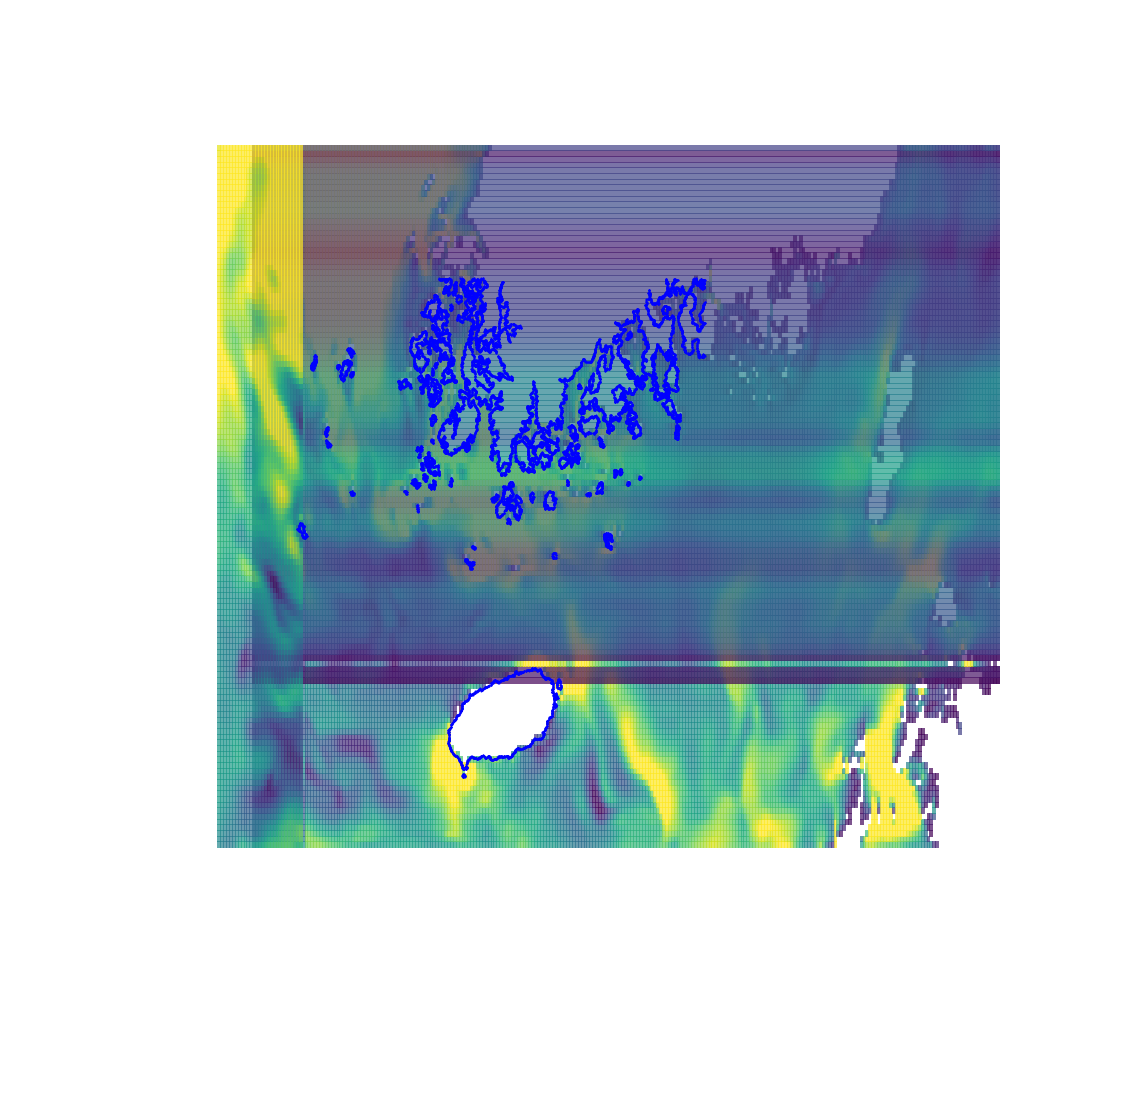

In [16]:
current_data_pd = np.zeros(X.shape)

for i in range(x_list.shape[0]):
    for j in range(y_list.shape[0]):
        if len(data_pd.current_force[(data_pd.lon==x_list[i]) & (data_pd.lat == y_list[j])].values):
            current_data_pd[j,i] = data_pd.current_force[(data_pd.lon==x_list[i]) & (data_pd.lat==y_list[j])].values

# 시각화
plt.figure(figsize=(20,20))
plt.plot(map1.lon.values,map1.lat.values, 'b.', MarkerSize = 2) # 연안 좌표

plt.pcolor(X, Y, current_data_pd, vmax=0.5, vmin=0, alpha=0.7)

# 그래프 설정
plt.xlim(lonlmt[0],lonlmt[1])
plt.ylim(latlmt[0],latlmt[1])
plt.axis('off')

plt.gca().set_axis_off()
#plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

# 그래프 저장
plt.savefig(f'./current_plots/current_force_lat{latlmt[0]}_{latlmt[1]}_lon{lonlmt[0]}_{lonlmt[1]}_date{1}.png',dpi=150, bbox_inches='tight', pad_inches=0)

In [ ]:
plt.figure(figsize=(20,20))
plt.pcolor(X, Y, np.zeros(X.shape), vmax=0.5, vmin=0, alpha=0.7)

In [ ]:
print(X,Y)

In [ ]:
current_data_pd